In [1]:
import pandas as pd

In [2]:
import pandas as pd

# Ruta a tus archivos CSV
archivo_csv1 = 'C:\\Users\\W10\Desktop\\henry data science\\proyecto individual 1\\PI MLOps - STEAM\\aniojugado.csv'
archivo_csv2 = 'C:\\Users\\W10\Desktop\\henry data science\\proyecto individual 1\\PI MLOps - STEAM\\games_genres2.csv'
archivo_csv3 = 'C:\\Users\\W10\Desktop\\henry data science\\proyecto individual 1\\PI MLOps - STEAM\\itemsplaytime.csv'

# Carga de datos desde los archivos CSV en DataFrames
df1_aniojugado = pd.read_csv(archivo_csv1)
df2_genres2 = pd.read_csv(archivo_csv2)
df3_playtime = pd.read_csv(archivo_csv3)


In [3]:
df1_aniojugado.head()

,Fecha_posteo,item_id
0,"November 5, 2011.",1250
1,"July 15, 2011.",22200
2,"April 21, 2011.",43110
3,"June 24, 2014.",251610
4,"September 8, 2013.",227300


In [4]:
df1_aniojugado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Fecha_posteo  59305 non-null  object
 1   item_id       59305 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 926.8+ KB


In [5]:
# Elimina las filas con valores nulos en el DataFrame df
df1_aniojugado = df1_aniojugado.dropna()

In [6]:
df2_genres2.head()

,genres,item_name,release_date
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,2018-01-04


In [7]:
df2_genres2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28834 entries, 0 to 28833
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28834 non-null  object
 1   item_name     28833 non-null  object
 2   release_date  28834 non-null  object
dtypes: object(3)
memory usage: 675.9+ KB


In [8]:
df2_genres2.head()

,genres,item_name,release_date
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,2018-01-04


In [9]:
df3_playtime.head()

,item_id,item_name,playtime_forever
0,10,Counter-Strike,6
1,20,Team Fortress Classic,0
2,30,Day of Defeat,7
3,40,Deathmatch Classic,0
4,50,Half-Life: Opposing Force,0


In [10]:
df3_playtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
dtypes: int64(2), object(1)
memory usage: 117.9+ MB


In [11]:
# Unir los DataFrames utilizando la columna 'item_id' como clave
df_merged1 = pd.merge(df1_aniojugado, df3_playtime, on='item_id')


MemoryError: Unable to allocate 5.00 GiB for an array with shape (670991953,) and data type int64

In [ ]:
df_merged1.head()

In [ ]:
# Unir los DataFrames utilizando la columna 'item_id' como clave
df_merged2 = pd.merge(df_merged1, df2_genres2, on='item_name')

In [ ]:
df_merged2.head()

In [ ]:
# Utiliza el método str.replace para eliminar los corchetes y comillas
df_merged2['genres'] = df_merged2['genres'].str.replace(r"[\[\]']", '', regex=True)



In [ ]:
df_merged2.head()

In [ ]:
df_merged2['genres'].unique()

In [ ]:
df_merged2.info()

In [ ]:
df_merged2.to_csv('dfPlayTimeGenre1_.csv', index=False)


In [ ]:
from google.colab import files

files.download('dfPlayTimeGenre1_.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
df = pd.read_parquet('df_primerafuncionv3parquet.parquet')

In [13]:
df

,playtime_forever,genres,Año
0,10006,Action,2009
1,428,Action,2009
2,1646,Action,2009
3,0,Action,2009
4,3546,Action,2009
...,...,...,...
16806922,143,"Adventure, Indie",2013
16806923,141,"Adventure, Indie",2014
16806924,136,"Adventure, Indie",2014
16806925,0,"Adventure, Casual, Indie, Simulation",2016


In [14]:
df['genres'] = df['genres'].astype(str) #pasamos a string
df['genres'] = df['genres'].str.lower() # dejamos todo en minuscula 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16806927 entries, 0 to 16806926
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   playtime_forever  int64 
 1   genres            object
 2   Año               int64 
dtypes: int64(2), object(1)
memory usage: 384.7+ MB


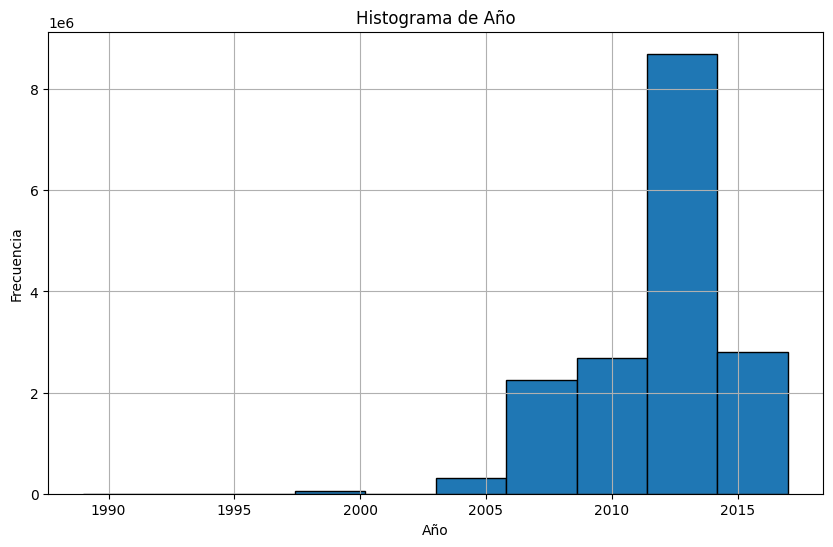

In [16]:
import matplotlib.pyplot as plt

años = df['Año']

plt.figure(figsize=(10, 6))
plt.hist(años, bins=10, edgecolor='k')
plt.title('Histograma de Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



In [17]:
# Vamos a reducirlo a la mitad por una cuestion de espacio en render 
df_reducido = df.sample(frac=0.5, random_state=1)

In [18]:
df_reducido.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8403464 entries, 12520897 to 16276368
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   playtime_forever  int64 
 1   genres            object
 2   Año               int64 
dtypes: int64(2), object(1)
memory usage: 256.5+ MB


In [19]:
# Vamos a tener que reducirlo un poco mas aun
tamano_muestra = 0.3  #30% tomamos

# Tomar una muestra aleatoria del DataFrame
df_reducido = df_reducido.sample(frac=tamano_muestra, random_state=42)

In [20]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2521039 entries, 10486571 to 8924735
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   playtime_forever  int64 
 1   genres            object
 2   Año               int64 
dtypes: int64(2), object(1)
memory usage: 76.9+ MB


In [21]:
df_reducido['playtime_forever'] = df_reducido['playtime_forever'] / 60
#dividimos en 60 porque queremos horas y esta en minutos

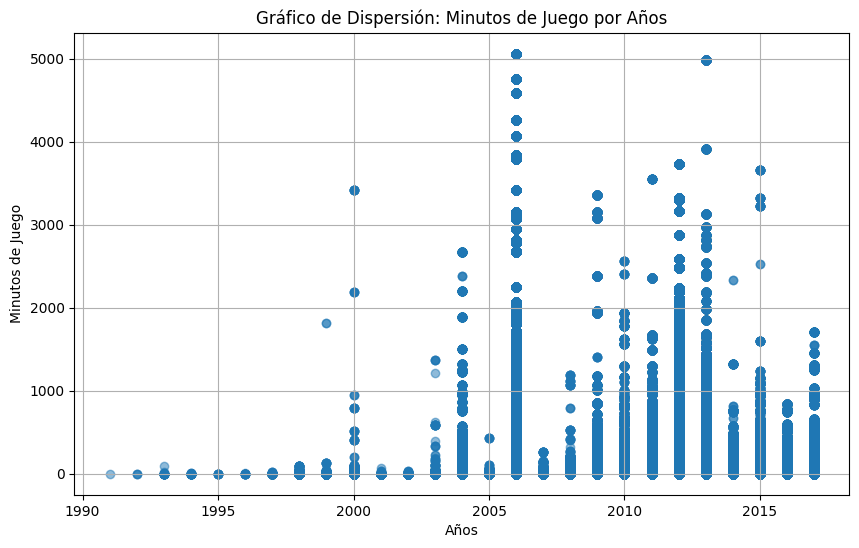

In [22]:
import matplotlib.pyplot as plt
playtime = df_reducido['playtime_forever']
años = df_reducido['Año']

# grafico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(años, playtime, alpha=0.5)  # alpha =transparencia de los puntos
plt.title('Gráfico de Dispersión: Minutos de Juego por Años')
plt.xlabel('Años')
plt.ylabel('Minutos de Juego')
plt.grid(True) 
plt.show()

In [23]:
parquet_file = "df_1redu.parquet"
# Exportamos el parquet
df_reducido.to_parquet(parquet_file, index=False)

In [24]:
def PlayTimeGenre(genero: str):
    # Filtra las filas donde el género coincide
    df_filtered = df[df['genres'] == genero]

    if df_filtered.empty:
        return f"No se encontraron datos para el género '{genero}'"

    # Encuentra el año con más horas jugadas para ese género
    year_with_most_playtime = df_filtered.groupby('Año')['playtime_forever'].sum().idxmax()

    return {f"Año de lanzamiento con más horas jugadas para el género '{genero}'": year_with_most_playtime}

In [25]:
# Ejemplo de uso:
result = PlayTimeGenre('Action')
print(result)

result = PlayTimeGenre('Strategy')
print(result)

No se encontraron datos para el género 'Action'
No se encontraron datos para el género 'Strategy'


In [26]:
print(result)


No se encontraron datos para el género 'Strategy'
